# PyGANS with 2D Functions

You can run this notebook online using Google Colab:
[[ Run Now ]](https://colab.research.google.com/drive/1Bshgw-z0KALqJvj2kNBqwF32sH3n1-Xs)

In [0]:
!pip install pygans 

These imports are necessary to display the animation correctly in Jupyter and Google Colab:

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

## 0. Import the modules

Keras modules are needed to create the generator and discriminator models.

In [0]:
from pygans.models import Discriminator, GAN, Generator
from pygans.animation import Animation_2D
from pygans.dataset import Dataset_Generator_2D

from keras.models import Sequential
from keras.layers import Dense

In [0]:
def create_generator(latent_dims, outputs=2):
  model = Sequential()
  model.add(Dense(15, activation="relu", input_dim=latent_dims))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(6, activation="relu"))
  model.add(Dense(outputs, activation="linear"))
  return model

def create_discriminator(inputs=2):
  model = Sequential()
  model.add(Dense(25, activation = "relu", input_dim=inputs, name="Input_Layer"))
  model.add(Dense(25, activation = "relu"))
  model.add(Dense(25, activation = "relu"))
  model.add(Dense(1, activation = "sigmoid", name="Output_Layer"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

## 1. Define your 2D function and your Lower and Upper Limits

In [0]:
def f(x):
  return x**2
  #return x**5 - 8*x**3 + 10*x + 6 
  #return 3*x**4 - 8*x**3 - 6*x**2 + 24*x - 4
  
lower_limit = -5    # Beginning of the function domain
upper_limit = 5     # End of the function domain

You can draw the function in the defined limits creating an Animation_2D object:

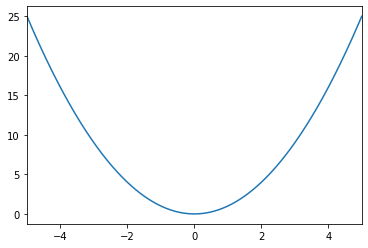

In [6]:
import matplotlib.pyplot as plt

anim = Animation_2D([], lower_limit, upper_limit, [])
anim.draw_function(f)
plt.show()

## 2. Define your Parameters

In [0]:
# Generation Parameters
steps = 1000        # Each X number of iterations, a plot is generated

# Define Hyperparameters
latent_dims = 5     # N of dimentions that will have the latent space
iterations = 20000  # N of batches that will feed the model
batch_size = 128    # Size of the training set in each iteration

## 3. Create your Dataset Generator

In [0]:
# Dataset Generation
dataset_generator = Dataset_Generator_2D(f, lower_limit, upper_limit)

## 4. Create the Models

In [0]:
# Create Models
disc_model , gen_model = create_discriminator(), create_generator(latent_dims)
discriminator = Discriminator(disc_model)
generator = Generator(gen_model, latent_dims)
gan = GAN(discriminator, generator)

## 5. Train the GAN

In [0]:
# Train GAN
plots, labels = gan.train(dataset_generator, iterations, batch_size, freq_generation=steps)

## 5+1. See the evolution of your Generative Adversarial Network step by step

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


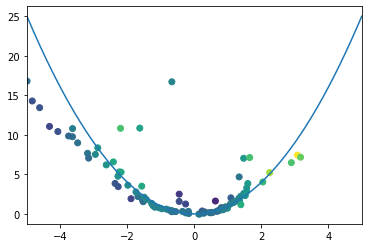

In [11]:
# Animation
fps = 10
anim = Animation_2D(plots, lower_limit, upper_limit, labels)
anim.draw_function(f)
anim_video = anim.get_animation(fps=fps)
anim.save(anim_video, fps, "/tmp")
anim_video